In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import urllib
import bs4
import pandas
from urllib import request
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import pycountry 

In [1]:
! pip install lxml 
soup = BeautifulSoup(html, "lxml")

NameError: name 'BeautifulSoup' is not defined

# Droit des femmes et développement économique

# Importation et traitement de la base de la Banque mondiale

In [5]:
df_bm=pd.read_csv("WDIData.csv")
df_bm.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.320475,16.643243,16.994695,17.313168,17.604950,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.224027,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,43.640661,NaN,NaN
2,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.525353,19.461383,17.790698,16.553470,23.907897,24.624725,26.813900,28.841150,NaN,NaN
3,Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,66.303599,66.496010,65.828988,66.926692,68.722184,71.085418,71.994933,73.589886,NaN,NaN
4,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_bm2=df_bm[["Country Code", "Country Name", "Indicator Name", "Indicator Code", "2019"]]
df_bm2.head(5)

,Country Code,Country Name,Indicator Name,Indicator Code,2019
0,AFE,Africa Eastern and Southern,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN
1,AFE,Africa Eastern and Southern,Access to electricity (% of population),EG.ELC.ACCS.ZS,43.640661
2,AFE,Africa Eastern and Southern,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,28.841150
3,AFE,Africa Eastern and Southern,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,73.589886
4,AFE,Africa Eastern and Southern,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN


# Importation et traitement de la base de l'OCDE

In [7]:
df_ocde=pd.read_csv('./oecd3.csv', sep=',', encoding='latin-1')
df_ocde.head(5)

,"ï»¿""REGION""",RÃ©gion,LOCATION,Pays,INC,Revenu,VAR,Variable,TIME,AnnÃ©e,Value,Flag Codes,Flags
0,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_HR_LAW,Loi,2019,2019,0.50,NaN,NaN
1,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_HR_ATT,Attitudes,2019,2019,21.10,NaN,NaN
2,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_HR_PRACT,Pratique,2019,2019,1.82,NaN,NaN
3,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_DV_LAW,Loi,2019,2019,0.00,NaN,NaN
4,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_IN_LAW,Loi,2019,2019,0.00,NaN,NaN


In [8]:
# on ne sélectionne que les lignes 'pratique' qui correspondent à la réalité des faits 
df_ocde2=df_ocde[df_ocde['Variable']=="Pratique"]
df_ocde2.rename(columns={'ï»¿"REGION"': 'region_monde', 'RÃ©gion': 'region', 'LOCATION': 'Country Code', 'Pays':'Country Name'}, inplace=True)
df_ocde2=df_ocde2[df_ocde2['region_monde']=="ALL"]
df_ocde2.head(5)

C:\Users\gadole\Documents\python\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,region_monde,region,Country Code,Country Name,INC,Revenu,VAR,Variable,TIME,AnnÃ©e,Value,Flag Codes,Flags
29,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,DF_HR_PRACT,Pratique,2019,2019,1.82,NaN,NaN
34,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,RPI_VAW_PRACT,Pratique,2019,2019,16.90,NaN,NaN
36,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,RPI_MW_PRACT,Pratique,2019,2019,105.50,NaN,NaN
38,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,RPI_RA_PRACT,Pratique,2019,2019,11.00,NaN,NaN
42,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,RAPFR_SAFS_PRACT,Pratique,2019,2019,50.00,NaN,NaN


In [9]:
# on ne sélectionne que les colonnes qui nous intéressent 
df_ocde3=df_ocde2[['Country Code', 'Country Name', 'VAR', 'Value']]
df_ocde3.head(5)

,Country Code,Country Name,VAR,Value
29,AUS,Australie,DF_HR_PRACT,1.82
34,AUS,Australie,RPI_VAW_PRACT,16.90
36,AUS,Australie,RPI_MW_PRACT,105.50
38,AUS,Australie,RPI_RA_PRACT,11.00
42,AUS,Australie,RAPFR_SAFS_PRACT,50.00


In [10]:
df_ocde3.shape

(3426, 4)

# Implémentation de la fonction de sélection des colonnes

In [11]:
def bm_select(Indicator, row_name):

    df=df_bm2[df_bm2['Indicator Code']==Indicator]
    df=df[["Country Code", "2019"]]
    df.rename(columns={'2019':row_name}, inplace=True)
    
    return df

In [12]:
def ocde_select(Indicator, row_name):

    df=df_ocde3[df_ocde3['VAR']==Indicator]
    df=df[["Country Code", "Value"]]
    df.rename(columns={'Value':row_name}, inplace=True)
    
    return df

In [13]:
def normalize_columns(df: pd.DataFrame, columns: list)-> pd.DataFrame:   
    for col in columns:
        try:

            df.loc[:,col] = (df.loc[:,col]- df.loc[:,col].min())/(df.loc[:,col].max()- df.loc[:,col].min())
        except:
            print(col + " n'a pas été normalisé \n")
    return df
            

# Création des bases de données et des indicateurs

## PIB

On crée une base de données qui associe à chaque pays son PIB par tête ( en $ constants de 2015). 

In [14]:
df_pib=bm_select('NY.GDP.PCAP.KD', "GDP per capita 2019")
df_pib.head(5)

,Country Code,GDP per capita 2019
469,AFE,1499.256275
1912,AFW,1843.558468
3355,ARB,6206.570758
4798,CSS,10050.327615
6241,CEB,14823.026908


In [15]:
df_pib_name=df_bm2[df_bm2['Indicator Name']=="GDP per capita (constant 2015 US$)"]
df_pib_name=df_pib_name[["Country Name","2019", "Country Code"]]
df_pib_name.rename(columns={'2019': 'GDP per capita 2019'}, inplace=True)
df_pib_name.head(5)

,Country Name,GDP per capita 2019,Country Code
469,Africa Eastern and Southern,1499.256275,AFE
1912,Africa Western and Central,1843.558468,AFW
3355,Arab World,6206.570758,ARB
4798,Caribbean small states,10050.327615,CSS
6241,Central Europe and the Baltics,14823.026908,CEB


On effectue quelques statistiques descriptives de ce PIB en le visualisant par aire géographique. Le PIB par tête semble plus élevé là où le droit des femmes semble le plus développé.

In [16]:
liste_continents=['AFE','AFW', 'ARB', 'EAS', 'EUU', 'LCN', 'MEA', 'NAC', 'WLD', 'SAS']
df_pib2=df_pib_name[df_pib_name['Country Code'].isin(liste_continents)]

In [17]:
df_pib2.sort_values("GDP per capita 2019",ascending = True, inplace = True)

<ipython-input-17-ea8ea425f77e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pib2.sort_values("GDP per capita 2019",ascending = True, inplace = True)


Text(0.5, 0, 'GDP per capita (2019)')

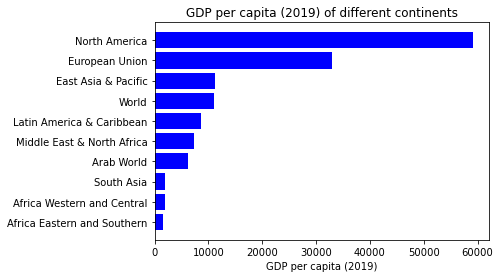

In [18]:
plt.barh(df_pib2["Country Name"], df_pib2['GDP per capita 2019'], color="blue")
plt.title('GDP per capita (2019) of different continents')
plt.xlabel('GDP per capita (2019)')

In [19]:
#df_pib2[values]=bm_select(Indicator="GDP per capita (constant 2015 US$)", row_name=values)

## Indicateur famille (F)

Scrapper le taux de fertilité


In [20]:
df_taux_fertilité=pd.read_csv('data_natalité.csv')
df_taux_fertilité.rename(columns={'Fertility Rate   In 2019 (Births/Woman)': 'Fertility'}, inplace=True)
df_taux_fertilité


,Country Name,Fertility
0,Niger,6.824
1,Somalia,5.978
2,DR Congo,5.819
3,Mali,5.785
4,Chad,5.649
...,...,...
259,Saint Kitts and Nevis,2.1 (2002)
260,Turks and Caicos Islands,-
261,Tuvalu,-
262,Vatican City,-


In [21]:
#Fonction pour donnner le nom de code du pays des pays scrappés pour le taux de fertilité 
def code_pays(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 est utilisé pour donner le code en 3 lettres du pays
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE# create a column for code 
df_taux_fertilité['CODE']=code_pays(df_taux_fertilité["Country Name"])
df_taux_fertilité

,Country Name,Fertility,CODE
0,Niger,6.824,NER
1,Somalia,5.978,SOM
2,DR Congo,5.819,None
3,Mali,5.785,MLI
4,Chad,5.649,TCD
...,...,...,...
259,Saint Kitts and Nevis,2.1 (2002),KNA
260,Turks and Caicos Islands,-,TCA
261,Tuvalu,-,TUV
262,Vatican City,-,None


In [22]:
df_taux_fertilité.rename(columns={'CODE': 'Country Code'}, inplace=True)
df_taux_fertilité

,Country Name,Fertility,Country Code
0,Niger,6.824,NER
1,Somalia,5.978,SOM
2,DR Congo,5.819,None
3,Mali,5.785,MLI
4,Chad,5.649,TCD
...,...,...,...
259,Saint Kitts and Nevis,2.1 (2002),KNA
260,Turks and Caicos Islands,-,TCA
261,Tuvalu,-,TUV
262,Vatican City,-,None


In [23]:
df_famille=df_taux_fertilité

In [24]:
#Fonctionqui sert à afficher deux chiffres après la virgule
def shorten_float(nb: float)-> float:
    return int(nb*100)/100.

In [25]:
def fertility_column_cleaner (char: str):
    assert type(char)==str, "The row does not contains str"
    if '-' in char: return np.NaN
    elif '(' in char:
        i=0
        while char[i+1]!= '(':
            i+=1
        return float(char[:i])
    else: return float(char)

In [26]:
df_famille.dropna(inplace=True)
df_famille["Fertility"] = df_famille["Fertility"].apply(fertility_column_cleaner)
df_famille

,Country Name,Fertility,Country Code
0,Niger,6.824,NER
1,Somalia,5.978,SOM
2,DR Congo,5.819,None
3,Mali,5.785,MLI
4,Chad,5.649,TCD
...,...,...,...
259,Saint Kitts and Nevis,2.100,KNA
260,Turks and Caicos Islands,NaN,TCA
261,Tuvalu,NaN,TUV
262,Vatican City,NaN,None


In [27]:
df_famille=df_taux_fertilité.merge(df_pib, on='Country Code', how='outer')
df_famille

,Country Name,Fertility,Country Code,GDP per capita 2019
0,Niger,6.824,NER,523.658778
1,Somalia,5.978,SOM,289.278592
2,DR Congo,5.819,None,NaN
3,Tanzania,4.832,None,NaN
4,Ivory Coast,4.593,None,NaN
...,...,...,...,...
342,NaN,NaN,TLS,1435.728071
343,NaN,NaN,VEN,NaN
344,NaN,NaN,VNM,2604.224166
345,NaN,NaN,VIR,NaN


In [28]:
df_famille.dropna(inplace=True)
df_famille

,Country Name,Fertility,Country Code,GDP per capita 2019
0,Niger,6.824,NER,523.658778
1,Somalia,5.978,SOM,289.278592
82,Mali,5.785,MLI,815.454597
83,Chad,5.649,TCD,660.069929
84,Angola,5.442,AGO,3458.650512
...,...,...,...,...
244,Dominica,1.900,DMA,7617.846091
245,Marshall Islands,4.000,MHL,3595.208450
248,Palau,2.200,PLW,15213.715905
249,San Marino,1.300,SMR,44709.458767


In [29]:
df_famille2=df_famille

In [30]:
#Jusqu'à présent le taux de fertilité était pris en compte comme une chaîne de caractère
#On la convertit donc en nombres
#df_famille2["Fertility"] = pd.to_numeric(df_famille2["Fertility"])

In [31]:
df_famille2["Indicateur famille"]=100-df_famille2["Fertility"]
df_famille2 = normalize_columns(df_famille2,["Indicateur famille"])
#df_famille2['Fertility']=df_famille2['Fertility'].apply(shorten_float)
#df_famille2["Indicateur famille"]=df_famille2["Fertility indicator"]/df_famille2["Fertility indicator"].max()

In [32]:
df_famille2

,Country Name,Fertility,Country Code,GDP per capita 2019,Indicateur famille
0,Niger,6.824,NER,523.658778,0.000000
1,Somalia,5.978,SOM,289.278592,0.147799
82,Mali,5.785,MLI,815.454597,0.181516
83,Chad,5.649,TCD,660.069929,0.205276
84,Angola,5.442,AGO,3458.650512,0.241440
...,...,...,...,...,...
244,Dominica,1.900,DMA,7617.846091,0.860238
245,Marshall Islands,4.000,MHL,3595.208450,0.493361
248,Palau,2.200,PLW,15213.715905,0.807827
249,San Marino,1.300,SMR,44709.458767,0.965059


In [33]:
df_famille2=df_famille2[["Country Code", "Indicateur famille"]]
df_famille2

,Country Code,Indicateur famille
0,NER,0.000000
1,SOM,0.147799
82,MLI,0.181516
83,TCD,0.205276
84,AGO,0.241440
...,...,...
244,DMA,0.860238
245,MHL,0.493361
248,PLW,0.807827
249,SMR,0.965059


In [34]:
df_famille2["Indicateur famille"]=(df_famille2["Indicateur famille"]-df_famille2["Indicateur famille"].min())/(df_famille2["Indicateur famille"].max()-df_famille2["Indicateur famille"].min())
df_famille2

<ipython-input-34-912d49953be5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_famille2["Indicateur famille"]=(df_famille2["Indicateur famille"]-df_famille2["Indicateur famille"].min())/(df_famille2["Indicateur famille"].max()-df_famille2["Indicateur famille"].min())


,Country Code,Indicateur famille
0,NER,0.000000
1,SOM,0.147799
82,MLI,0.181516
83,TCD,0.205276
84,AGO,0.241440
...,...,...
244,DMA,0.860238
245,MHL,0.493361
248,PLW,0.807827
249,SMR,0.965059


In [35]:
df_famille2.set_index(["Country Code"], inplace=True)

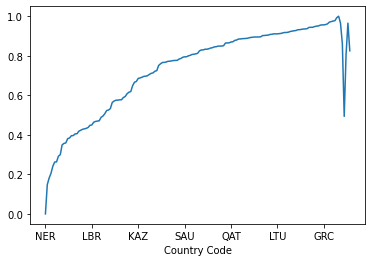

In [36]:
df_famille2["Indicateur famille"].plot()

## Indicateur santé (S)

Trois variables:
- Espérance de vie à la naissance pour les femmes (BM)
- Part des femmes non-enceintes anémiées (BM)
- Part des femmes séropositives (BM)

In [37]:
df_esperance_de_vie=bm_select("SP.DYN.LE00.FE.IN", 'Life expectancy of women at birth' )
df_esperance_de_vie.head(5)

,Country Code,Life expectancy of women at birth
693,AFE,66.202116
2136,AFW,59.231072
3579,ARB,73.832314
5022,CSS,76.032605
6465,CEB,80.833612


In [38]:
df_anemia=bm_select("SH.ANM.NPRG.ZS", 'Prevalence of anemia among non pregnant women' )
df_anemia.head(5)

,Country Code,Prevalence of anemia among non pregnant women
1087,AFE,33.432299
2530,AFW,50.511312
3973,ARB,33.212609
5416,CSS,20.080555
6859,CEB,NaN


In [39]:
df_hiv=bm_select("SH.DYN.AIDS.FE.ZS", 'Women share of population living with HIV' )
df_hiv.head(5)

,Country Code,Women share of population living with HIV
1441,AFE,60.062444
2884,AFW,61.990050
4327,ARB,40.461413
5770,CSS,49.739577
7213,CEB,NaN


In [40]:
# On fusionne tout ça dans le df santé
df_sante=df_esperance_de_vie.merge(df_anemia, on='Country Code', how='left')
df_sante=df_sante.merge(df_hiv, on='Country Code', how='outer')

### Construction de l'indicateur santé 

In [41]:
df_sante=df_sante.merge(df_pib, on='Country Code', how='outer')
df_sante.head(5)

,Country Code,Life expectancy of women at birth,Prevalence of anemia among non pregnant women,Women share of population living with HIV,GDP per capita 2019
0,AFE,66.202116,33.432299,60.062444,1499.256275
1,AFW,59.231072,50.511312,61.990050,1843.558468
2,ARB,73.832314,33.212609,40.461413,6206.570758
3,CSS,76.032605,20.080555,49.739577,10050.327615
4,CEB,80.833612,NaN,NaN,14823.026908


In [42]:
df_sante.dropna(inplace=True)

X = df_sante[["Life expectancy of women at birth", "Prevalence of anemia among non pregnant women", "Women share of population living with HIV"]]
X = sm.add_constant(X) # une autre façon d'ajouter une constante 
y = df_sante["GDP per capita 2019"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     GDP per capita 2019   R-squared:                       0.406
Model:                             OLS   Adj. R-squared:                  0.394
Method:                  Least Squares   F-statistic:                     34.37
Date:                 Thu, 06 Jan 2022   Prob (F-statistic):           5.43e-17
Time:                         10:00:31   Log-Likelihood:                -1688.4
No. Observations:                  155   AIC:                             3385.
Df Residuals:                      151   BIC:                             3397.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

Ne sont pris en compte ici que 155 observations, correspondants aux pays sans nan sur toute une ligne. Les résultats sont donc approximatifs pour l'ensemble de l'échantillon, constitué de 266 pays. Je décide de donner un poids différent aux variables dans la construction de mon indicateur, s'appuyant sur la significativité pratique et statistique de ces indicateurs. 
- l'espérance de vie à la naissance semble très significative et explicative. Je lui confère 3/4 de l'explication de l'indicateur
- la prévalence de l'anémie parmi les femmes pas enceintes: 2/12
- la part de femmes vivant avec le VIH: 1/12

In [43]:
df_sante2=df_sante

In [44]:
df_sante2["Share of np women living without anemia"]=100-df_sante2["Prevalence of anemia among non pregnant women"]
df_sante2["Share of np women living without HIV"]=100-df_sante2["Women share of population living with HIV"]

In [45]:
df_sante2["Share of np women living without anemia indicator"]=df_sante2["Share of np women living without anemia"]/df_sante2["Share of np women living without anemia"].max()
df_sante2["Share of np women living without HIV indicator"]=df_sante2["Share of np women living without HIV"]/df_sante2["Share of np women living without HIV"].max()
df_sante2["Life expectancy of women at birth indicator"]=df_sante2["Life expectancy of women at birth"]/df_sante2["Life expectancy of women at birth"].max()

In [46]:
df_sante2["Indicateur sante"]= 3/4 *df_sante2["Life expectancy of women at birth indicator"]+ 2/12*df_sante2["Share of np women living without anemia indicator"] + 1/12*df_sante2["Share of np women living without HIV indicator"]

In [47]:
df_sante2=df_sante2[["Country Code", "Indicateur sante"]]

In [48]:
# je répartis les données entre 0 et 1
df_sante2["Indicateur sante"]=(df_sante2["Indicateur sante"]-df_sante2["Indicateur sante"].min())/(df_sante2["Indicateur sante"].max()-df_sante2["Indicateur sante"].min())
df_sante2

<ipython-input-48-67272e9bbbd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sante2["Indicateur sante"]=(df_sante2["Indicateur sante"]-df_sante2["Indicateur sante"].min())/(df_sante2["Indicateur sante"].max()-df_sante2["Indicateur sante"].min())


,Country Code,Indicateur sante
0,AFE,0.337619
1,AFW,0.096236
2,ARB,0.555785
3,CSS,0.645313
9,EMU,0.927860
...,...,...
256,URY,0.807036
257,UZB,0.606327
260,VNM,0.762405
264,ZMB,0.362588


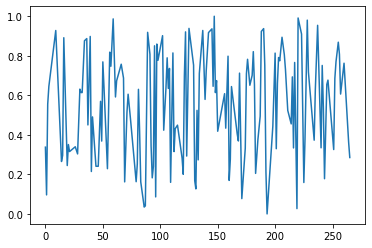

In [49]:
df_sante2["Indicateur sante"].plot()

## Indicateur ressources économiques (RE)

Trois variables:
- part des femmes proprétaires d'un compte en banque (OCDE)
- partage des tâches domestiques (OCDE)
- variable pour mesurer les écarts de salaire avec les hommes 

In [50]:
df_domestique=ocde_select("DF_HR_PRACT",'Domestic time ratio women on men')
df_domestique.head(5)

,Country Code,Domestic time ratio women on men
29,AUS,1.82
83,AUT,1.95
137,BEL,1.55
192,CAN,1.51
299,DNK,1.39


In [51]:
df_banque=ocde_select("RAPFR_SAFS_PRACT",'Women s share amoung bank account owners')
df_banque.head(5)

,Country Code,Women s share amoung bank account owners
42,AUS,50.0
97,AUT,51.1
151,BEL,50.8
206,CAN,50.4
259,CZE,47.8


In [52]:
# On fusionne tout ça dans le df ressources économiques
df_ressources_eco=df_domestique.merge(df_banque, on='Country Code', how='outer')
df_ressources_eco = df_ressources_eco.drop_duplicates()
df_ressources_eco

,Country Code,Domestic time ratio women on men,Women s share amoung bank account owners
0,AUS,1.82,50.0
4,AUT,1.95,51.1
8,BEL,1.55,50.8
12,CAN,1.51,50.4
16,DNK,1.39,50.3
...,...,...,...
498,SOM,NaN,38.7
500,TJK,NaN,44.5
502,TGO,NaN,42.1
504,YEM,NaN,12.6


## Construction de l'indicateur ressources économiques

In [53]:
df_ressources_eco=df_ressources_eco.merge(df_pib, on='Country Code', how='outer')
df_ressources_eco

,Country Code,Domestic time ratio women on men,Women s share amoung bank account owners,GDP per capita 2019
0,AUS,1.82,50.0,58923.208212
1,AUT,1.95,51.1,46717.720729
2,BEL,1.55,50.8,42887.655132
3,CAN,1.51,50.4,44958.088687
4,DNK,1.39,50.3,57553.131240
...,...,...,...,...
263,TON,NaN,NaN,4652.588587
264,TCA,NaN,NaN,28693.061321
265,TUV,NaN,NaN,3674.354085
266,VUT,NaN,NaN,2882.402195


In [54]:
#df_ressources_eco[df_ressources_eco['Country Name']=="Nigeria"]['Women s share amoung bank account owners']

In [55]:
df_ressources_eco.dropna(inplace=True)

X = df_ressources_eco[["Domestic time ratio women on men", "Women s share amoung bank account owners"]]
X = sm.add_constant(X) 
y = df_ressources_eco["GDP per capita 2019"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     GDP per capita 2019   R-squared:                       0.193
Model:                             OLS   Adj. R-squared:                  0.176
Method:                  Least Squares   F-statistic:                     11.12
Date:                 Thu, 06 Jan 2022   Prob (F-statistic):           4.68e-05
Time:                         10:00:32   Log-Likelihood:                -1084.9
No. Observations:                   96   AIC:                             2176.
Df Residuals:                       93   BIC:                             2183.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

Les variables semblent assez pertinentes : l'hypothèse nulle est rejetée au seul de 5% pour les deux variables. Le R carré est assez faible mais cela montre néanmoins que les variables peuvent être prise en compte dans l'explication du capital du pays. 

Une augmentation d'une unité du ratio de temps domestique homme/femme a un impact négatif important sur le PIB par habitant tandis qu'une augmentation d'une unité de la proportion des femmes possédant un compte bancaire a un impact positif plus néglibeable sur le PIB par habitant du pays.

Au vu des résultats de la régression je décide de donner un facteur 7/10 au ratio du temps de travail domestique et 3/10 à la part des femmes possédant un compte bancaire. Je vais désormais rapporter mes données à une valeur entre 0 et 1. 

In [56]:
df_ressources_eco2=df_ressources_eco

In [57]:
df_ressources_eco2["Women's share amoung bank account owners indicator"]=df_ressources_eco2["Women s share amoung bank account owners"]/df_ressources_eco2["Women s share amoung bank account owners"].max()
df_ressources_eco2["Domestic time ratio women on men (quota)"]=100-df_ressources_eco2["Domestic time ratio women on men"]
df_ressources_eco2["Domestic time ratio women on men indicator"]=df_ressources_eco2["Domestic time ratio women on men (quota)"]/df_ressources_eco2["Domestic time ratio women on men (quota)"].max()

In [58]:
df_ressources_eco2

,Country Code,Domestic time ratio women on men,Women s share amoung bank account owners,GDP per capita 2019,Women's share amoung bank account owners indicator,Domestic time ratio women on men (quota),Domestic time ratio women on men indicator
0,AUS,1.82,50.0,58923.208212,0.900901,98.18,0.994329
1,AUT,1.95,51.1,46717.720729,0.920721,98.05,0.993012
2,BEL,1.55,50.8,42887.655132,0.915315,98.45,0.997063
3,CAN,1.51,50.4,44958.088687,0.908108,98.49,0.997468
4,DNK,1.39,50.3,57553.131240,0.906306,98.61,0.998683
...,...,...,...,...,...,...,...
97,RWA,2.63,46.0,885.599612,0.828829,97.37,0.986125
98,SLE,2.99,39.5,651.897740,0.711712,97.01,0.982479
99,TZA,3.72,45.7,985.448208,0.823423,96.28,0.975086
100,UGA,3.88,41.3,898.407515,0.744144,96.12,0.973466


In [59]:
df_ressources_eco2["Indicateur ressources éco"]= 3/10 *df_ressources_eco2["Domestic time ratio women on men indicator"]+ 7/10*df_ressources_eco2["Women's share amoung bank account owners indicator"] 

In [60]:
df_ressources_eco2=df_ressources_eco2[["Country Code", "Indicateur ressources éco"]]

In [61]:
df_ressources_eco2["Indicateur ressources économiques"]=(df_ressources_eco2["Indicateur ressources éco"]-df_ressources_eco2["Indicateur ressources éco"].min())/(df_ressources_eco2["Indicateur ressources éco"].max()-df_ressources_eco2["Indicateur ressources éco"].min())

<ipython-input-61-5158ea55fa40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ressources_eco2["Indicateur ressources économiques"]=(df_ressources_eco2["Indicateur ressources éco"]-df_ressources_eco2["Indicateur ressources éco"].min())/(df_ressources_eco2["Indicateur ressources éco"].max()-df_ressources_eco2["Indicateur ressources éco"].min())


In [62]:
df_ressources_eco2 = df_ressources_eco2.drop(df_ressources_eco2 .columns[1], axis = 1)
df_ressources_eco2 

,Country Code,Indicateur ressources économiques
0,AUS,0.868785
1,AUT,0.895291
2,BEL,0.890240
3,CAN,0.880558
4,DNK,0.878795
...,...,...
97,RWA,0.764736
98,SLE,0.601370
99,TZA,0.750783
100,UGA,0.640697


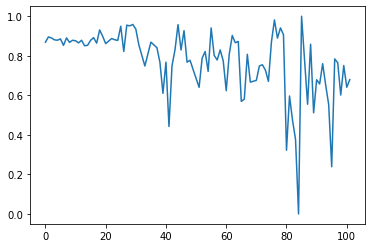

In [63]:
df_ressources_eco2["Indicateur ressources économiques"].plot()

## Indicateur éducation (E)

3 variables : 
- Adolescents out of school, female (% of female lower secondary school age) (à comparer avec les hommes) (BM)
- Children out of school, female (% of female primary school age) (à comparer avec les hommes) (BM)
- Primary completion rate, female (% of relevant age group) (à comparer avec les hommes) (BM)

In [64]:
df_descolariation_ado_w=bm_select("SE.PRM.UNER.FE.ZS",'Adolescents s share out of school, female')
df_descolariation_ado_w.dropna(inplace=True)
df_descolariation_ado_w.head(5)

,Country Code,"Adolescents s share out of school, female"
3062,ARB,15.58040
5948,CEB,4.30292
7391,EAR,7.16961
8834,EAS,3.71035
10277,EAP,3.89582


In [65]:
df_descolariation_child_w=bm_select("SE.SEC.UNER.LO.FE.ZS",'Children s share out of school, female')
df_descolariation_child_w.dropna(inplace=True)
df_descolariation_child_w.head(5)

,Country Code,"Children s share out of school, female"
2936,ARB,18.380989
4379,CSS,11.200680
5822,CEB,5.755160
7265,EAR,14.966480
8708,EAS,8.193100


In [66]:
df_primary_completion_rate_f=bm_select("SE.PRM.CMPT.FE.ZS",'Women who completed primary')
df_primary_completion_rate_f.dropna(inplace=True)
df_primary_completion_rate_f.head(5)

,Country Code,Women who completed primary
4003,ARB,84.786118
6889,CEB,93.246231
8332,EAR,92.725899
9775,EAS,98.524117
11218,EAP,98.392372


In [67]:
df_descolariation_ado_m=bm_select("SE.SEC.UNER.LO.MA.ZS",'Adolescents s share out of school, male')
df_descolariation_ado_m.dropna(inplace=True)
df_descolariation_ado_m.head(5)

,Country Code,"Adolescents s share out of school, male"
2937,ARB,14.44424
4380,CSS,13.17920
5823,CEB,4.96398
7266,EAR,17.18194
8709,EAS,9.76009


In [68]:
df_descolariation_child_m=bm_select("SE.PRM.UNER.MA.ZS",'Children s share out of school, male')
df_descolariation_child_m.dropna(inplace=True)
df_descolariation_child_m.head(5)

,Country Code,"Children s share out of school, male"
3063,ARB,12.52604
5949,CEB,4.57264
7392,EAR,5.96515
8835,EAS,2.86261
10278,EAP,2.96687


In [69]:
df_primary_completion_rate_m=bm_select("SE.PRM.CMPT.MA.ZS",'Men who completed primary')
df_primary_completion_rate_m.dropna(inplace=True)
df_primary_completion_rate_m.head(5)

,Country Code,Men who completed primary
4004,ARB,88.188232
6890,CEB,93.638771
8333,EAR,91.436913
9776,EAS,98.225960
11219,EAP,98.043877


In [70]:
#On fusionne nos différents data frame
df_education = df_descolariation_ado_w.merge(df_descolariation_child_w, on='Country Code', how='left')
df_education = df_education.merge(df_descolariation_child_m, on='Country Code', how='outer')
df_education = df_education.merge(df_primary_completion_rate_f, on='Country Code', how='outer')
df_education = df_education.merge(df_primary_completion_rate_m, on='Country Code', how='outer')
df_education = df_education.merge(df_descolariation_ado_m, on='Country Code', how='outer')
df_education

,Country Code,"Adolescents s share out of school, female","Children s share out of school, female","Children s share out of school, male",Women who completed primary,Men who completed primary,"Adolescents s share out of school, male"
0,ARB,15.58040,18.380989,12.52604,84.786118,88.188232,14.44424
1,CEB,4.30292,5.755160,4.57264,93.246231,93.638771,4.96398
2,EAR,7.16961,14.966480,5.96515,92.725899,91.436913,17.18194
3,EAS,3.71035,8.193100,2.86261,98.524117,98.225960,9.76009
4,EAP,3.89582,8.626310,2.96687,98.392372,98.043877,10.27668
...,...,...,...,...,...,...,...
182,BRA,NaN,NaN,NaN,NaN,NaN,3.43146
183,FRA,NaN,NaN,NaN,NaN,NaN,0.41550
184,NLD,NaN,NaN,NaN,NaN,NaN,3.25716
185,NZL,NaN,NaN,NaN,NaN,NaN,0.17013


## Construction de l'indicateur éducation

In [71]:
#On fusionne le data frame précédent avec celui contenant les données pour le PIB
df_education2=df_education.merge(df_pib, on='Country Code', how='outer')
df_education2

,Country Code,"Adolescents s share out of school, female","Children s share out of school, female","Children s share out of school, male",Women who completed primary,Men who completed primary,"Adolescents s share out of school, male",GDP per capita 2019
0,ARB,15.58040,18.380989,12.52604,84.786118,88.188232,14.44424,6206.570758
1,CEB,4.30292,5.755160,4.57264,93.246231,93.638771,4.96398,14823.026908
2,EAR,7.16961,14.966480,5.96515,92.725899,91.436913,17.18194,3535.796160
3,EAS,3.71035,8.193100,2.86261,98.524117,98.225960,9.76009,11233.156450
4,EAP,3.89582,8.626310,2.96687,98.392372,98.043877,10.27668,8122.691059
...,...,...,...,...,...,...,...,...
261,VEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,VNM,NaN,NaN,NaN,NaN,NaN,NaN,2604.224166
263,VIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
#On supprime les lignes pour lesquelles il existe des données manquantes
df_education2.dropna(inplace=True)
df_education2

,Country Code,"Adolescents s share out of school, female","Children s share out of school, female","Children s share out of school, male",Women who completed primary,Men who completed primary,"Adolescents s share out of school, male",GDP per capita 2019
0,ARB,15.580400,18.380989,12.52604,84.786118,88.188232,14.444240,6206.570758
1,CEB,4.302920,5.755160,4.57264,93.246231,93.638771,4.963980,14823.026908
2,EAR,7.169610,14.966480,5.96515,92.725899,91.436913,17.181940,3535.796160
3,EAS,3.710350,8.193100,2.86261,98.524117,98.225960,9.760090,11233.156450
4,EAP,3.895820,8.626310,2.96687,98.392372,98.043877,10.276680,8122.691059
...,...,...,...,...,...,...,...,...
103,ZAF,9.809540,9.923050,11.74443,93.236481,90.783951,10.718860,5574.643890
107,TLS,3.025670,8.572550,6.71849,109.208267,101.314278,11.838390,1435.728071
109,TUR,5.026730,3.997050,4.54793,90.439949,91.236282,3.003520,11956.197821
110,TUV,22.486771,30.021139,15.97484,75.409843,78.294571,31.799999,3674.354085


In [73]:
df_education2["Ratio women on men ado out school"]= df_education2["Adolescents s share out of school, female"]/df_education2["Adolescents s share out of school, male"]
df_education2["Ratio women on men children out school"]= df_education2["Children s share out of school, female"]/df_education2["Children s share out of school, male"]
df_education2["Ratio women on men completed primary"]= df_education2["Women who completed primary"]/df_education2["Men who completed primary"]
df_education2

,Country Code,"Adolescents s share out of school, female","Children s share out of school, female","Children s share out of school, male",Women who completed primary,Men who completed primary,"Adolescents s share out of school, male",GDP per capita 2019,Ratio women on men ado out school,Ratio women on men children out school,Ratio women on men completed primary
0,ARB,15.580400,18.380989,12.52604,84.786118,88.188232,14.444240,6206.570758,1.078658,1.467422,0.961422
1,CEB,4.302920,5.755160,4.57264,93.246231,93.638771,4.963980,14823.026908,0.866829,1.258608,0.995808
2,EAR,7.169610,14.966480,5.96515,92.725899,91.436913,17.181940,3535.796160,0.417276,2.508986,1.014097
3,EAS,3.710350,8.193100,2.86261,98.524117,98.225960,9.760090,11233.156450,0.380155,2.862108,1.003035
4,EAP,3.895820,8.626310,2.96687,98.392372,98.043877,10.276680,8122.691059,0.379093,2.907546,1.003554
...,...,...,...,...,...,...,...,...,...,...,...
103,ZAF,9.809540,9.923050,11.74443,93.236481,90.783951,10.718860,5574.643890,0.915166,0.844915,1.027015
107,TLS,3.025670,8.572550,6.71849,109.208267,101.314278,11.838390,1435.728071,0.255581,1.275964,1.077916
109,TUR,5.026730,3.997050,4.54793,90.439949,91.236282,3.003520,11956.197821,1.673613,0.878872,0.991272
110,TUV,22.486771,30.021139,15.97484,75.409843,78.294571,31.799999,3674.354085,0.707131,1.879276,0.963155


In [74]:
X = df_education2[["Ratio women on men ado out school", "Ratio women on men children out school", "Ratio women on men completed primary"]]
X = sm.add_constant(X)
y = df_education2["GDP per capita 2019"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     GDP per capita 2019   R-squared:                       0.004
Model:                             OLS   Adj. R-squared:                 -0.034
Method:                  Least Squares   F-statistic:                    0.1003
Date:                 Thu, 06 Jan 2022   Prob (F-statistic):              0.960
Time:                         10:00:33   Log-Likelihood:                -914.74
No. Observations:                   83   AIC:                             1837.
Df Residuals:                       79   BIC:                             1847.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

On constate que les variables ne sont pas significatives statistiquement. 
Par ailleurs, celles qui portent sur le ratio de déscolarisation sont peu significatives en pratique. 
On conserve ici 83 observations sur les 266 initiales. 
On accorde le poids suivant aux différentes variables explicatives : 
 - Ratio des adolescents qui ne sont pas scolarisés :  1/20
 - Ration des enfants qui ne sont pas scolarisés : 1/20
 - Ratio de fin de scolarisation primaire : 18/20

In [75]:
df_education2["ratio ado desco indicator"] = df_education2["Ratio women on men ado out school"]/df_education2["Ratio women on men ado out school"].max()
df_education2["ratio children desco indicator"] = df_education2["Ratio women on men children out school"]/df_education2["Ratio women on men children out school"].max()
df_education2["ratio primary completion rate indicator"] = df_education2["Ratio women on men completed primary"]/df_education2["Ratio women on men completed primary"].max()

In [76]:
#Création de l'indicateur à l'aide des coefficients de pondération
df_education2["Indicateur education"] = 1/20 * df_education2["ratio ado desco indicator"] + 1/20 * df_education2["ratio children desco indicator"] + 18/20 * df_education2["ratio primary completion rate indicator"]

In [77]:
df_education2[["Country Code", "Indicateur education"]]

,Country Code,Indicateur education
0,ARB,0.708366
1,CEB,0.733410
2,EAR,0.747500
3,EAS,0.739590
4,EAP,0.740002
...,...,...
103,ZAF,0.756097
107,TLS,0.793514
109,TUR,0.730185
110,TUV,0.709751


In [78]:
#On échelonne les valeurs entre 0 et 1
df_education2["Indicateur education"]=(df_education2["Indicateur education"]-df_education2["Indicateur education"].min())/(df_education2["Indicateur education"].max()-df_education2["Indicateur education"].min())
df_education2[["Country Code", "Indicateur education"]]

,Country Code,Indicateur education
0,ARB,0.181754
1,CEB,0.288130
2,EAR,0.347979
3,EAS,0.314379
4,EAP,0.316128
...,...,...
103,ZAF,0.384492
107,TLS,0.543423
109,TUR,0.274429
110,TUV,0.187635


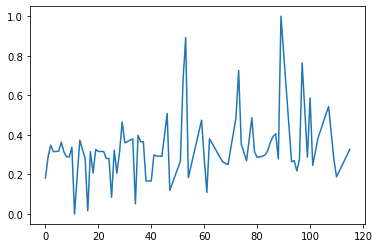

In [79]:
df_education2["Indicateur education"].plot()

In [80]:
df_education3 = df_education2[["Country Code", "Indicateur education"]]
df_education3

,Country Code,Indicateur education
0,ARB,0.181754
1,CEB,0.288130
2,EAR,0.347979
3,EAS,0.314379
4,EAP,0.316128
...,...,...
103,ZAF,0.384492
107,TLS,0.543423
109,TUR,0.274429
110,TUV,0.187635


## Indicateur autonomie du corps (AC)

### Srapping des données sur l'avortement 

In [81]:
url_abortion_law = "https://en.wikipedia.org/wiki/Abortion_law"
request_text = request.urlopen(url_abortion_law).read() 
page = bs4.BeautifulSoup(request_text, "lxml")
table_abortion_law = page.find('table', {'class' : 'wikitable sortable collapsible'})
table_body = table_abortion_law.find('tbody')

In [83]:
rows = table_body.find_all('tr')
cols = rows[1].find_all('td')

In [84]:
dico_abortion = dict()
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if len(cols) > 0 : 
        dico_abortion[cols[0]] = cols[1:]

In [85]:
data_abortion = pandas.DataFrame.from_dict(dico_abortion,orient='index')

### Nettoyage de la base de données

In [86]:
# Fonction qui va servir pour le nettoyage de la base de données
def cleaner_abortion (char: str):
    assert type(char)==str, "The row does not contains str"
    if '-' in char: return np.NaN
    elif '[' in char:
        i=0
        while char[i+1]!= '[':
            i+=1
        return str(char[:i+1])
    else: return str(char)

In [87]:
for row in rows:
    cols = row.find_all('th')
    print(cols)
    if len(cols) > 0 : 
        cols = [ele.get_text(separator=' ').strip().title() for ele in cols]
        columns_country = cols

[<th>Country</th>, <th style="width:70px">Risk to life</th>, <th style="width:70px">Risk to health</th>, <th style="width:70px">Rape</th>, <th style="width:70px">Fetal impairment</th>, <th style="width:70px">Economic or social</th>, <th style="width:70px">On request
</th>]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[<th>Country</th>, <th style="width:70px">Risk to life</th>, <th style="width:70px">Risk to health</th>, <th style="width:70px">Rape</th>, <th style="width:70px">Fetal impairment</th>, <th style="width:70px">Economic or social</th>, <th style="width:70px">On request
</th>]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[<th>Country</th>, <th style="width:70px">Risk to life</th>, <th style="width:70px">Risk to health</th>, <th style="width:70px">Rape</th>, <th style="width:70px">Fetal impairment</th>, <th style="width:70px">Economic or social</th>, <th style="widt

In [88]:
data_abortion.columns = columns_country[1:]

In [89]:
data_abortion.reset_index(inplace=True)
data_abortion.rename(columns={'index': 'Country Name'}, inplace=True)
data_abortion.head()

,Country Name,Risk To Life,Risk To Health,Rape,Fetal Impairment,Economic Or Social,On Request
0,Abkhazia[32],prohibited,prohibited,prohibited,prohibited,prohibited,prohibited
1,Afghanistan[needs update?],permitted[k],prohibited,prohibited,prohibited[k],prohibited[k],prohibited
2,Albania[16],22 weeks,22 weeks,22 weeks,no limit,22 weeks,12 weeks
3,Algeria[39],permitted,permitted,prohibited,prohibited,prohibited,prohibited
4,Andorra,prohibited[l],prohibited,prohibited,prohibited,prohibited,prohibited


In [90]:
data_abortion2=data_abortion
data_abortion2['abortion'] = data_abortion2['On Request'].str.contains("permitted|weeks", na=False).astype(int)
data_abortion2["Country Name"]=data_abortion2["Country Name"].apply(cleaner_abortion)
data_abortion2=data_abortion2[["Country Name", "abortion"]]
data_abortion2

,Country Name,abortion
0,Abkhazia,0
1,Afghanistan,0
2,Albania,1
3,Algeria,0
4,Andorra,0
...,...,...
348,Venezuela,0
349,Vietnam,1
350,Yemen,0
351,Zambia,0


Finalement, on obtient une base avec le nom du pays ainsi qu'une indicatrice reflétant la possibilité pour les femmes ou non d'avorter sur demande. Ce choix du type d'avortement nous a semblé le plus pertinent parmi l'ensemble des choix qui étaient possibles. 

In [91]:
df_avortement=data_abortion2.merge(df_pib_name, on='Country Name', how='inner')
df_avortement=df_avortement[["Country Name","Country Code", "GDP per capita 2019", "abortion"]]
df_avortement

,Country Name,Country Code,GDP per capita 2019,abortion
0,Afghanistan,AFG,577.563058,0
1,Albania,ALB,4549.457441,1
2,Algeria,DZA,4111.306192,0
3,Andorra,AND,39003.384448,0
4,Angola,AGO,3458.650512,0
...,...,...,...,...
162,Uzbekistan,UZB,3013.552163,1
163,Vanuatu,VUT,2882.402195,0
164,Vietnam,VNM,2604.224166,1
165,Zambia,ZMB,1348.743220,0


In [244]:
df_contraception=df_ocde3[df_ocde3['VAR']=="RPI_RA_PRACT"]
df_contraception=df_contraception[['Country Code', "Value"]]
df_contraception.rename(columns={'Value': 'No contraception used without wanting having children'}, inplace=True)
df_contraception.head(5)

,Country Code,No contraception used without wanting having children
38,AUS,11.0
92,AUT,10.0
146,BEL,7.0
201,CAN,7.0
254,CZE,4.3


In [245]:
df_violences=df_ocde3[df_ocde3['VAR']=="RPI_VAW_PRACT"]
df_violences=df_violences[['Country Code', "Value"]]
df_violences.rename(columns={'Value': 'Physical and sexual violences on women'}, inplace=True)
df_violences.head(5)

,Country Code,Physical and sexual violences on women
34,AUS,16.9
88,AUT,13.0
142,BEL,24.0
197,CAN,1.9
250,CZE,21.0


In [246]:
df_autonomie_corps=df_contraception.merge(df_violences, on='Country Code', how='outer')
df_autonomie_corps=df_autonomie_corps.merge(df_avortement, on='Country Code', how='outer')
df_autonomie_corps = df_autonomie_corps.drop_duplicates()
df_autonomie_corps.dropna(inplace=True)
df_autonomie_corps.head(5)

,Country Code,No contraception used without wanting having children,Physical and sexual violences on women,Country Name,GDP per capita 2019,abortion
0,AUS,11.0,16.9,Australia,58923.208212,0.0
4,AUT,10.0,13.0,Austria,46717.720729,0.0
8,BEL,7.0,24.0,Belgium,42887.655132,1.0
12,CAN,7.0,1.9,Canada,44958.088687,1.0
16,CZE,4.3,21.0,Czech Republic,20202.151592,1.0


In [247]:
X = df_autonomie_corps[["No contraception used without wanting having children", "Physical and sexual violences on women", "abortion"]]
X = sm.add_constant(X) # une autre façon d'ajouter une constante 
y = df_autonomie_corps["GDP per capita 2019"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     GDP per capita 2019   R-squared:                       0.266
Model:                             OLS   Adj. R-squared:                  0.246
Method:                  Least Squares   F-statistic:                     13.38
Date:                 Tue, 04 Jan 2022   Prob (F-statistic):           1.62e-07
Time:                         15:25:50   Log-Likelihood:                -1278.2
No. Observations:                  115   AIC:                             2564.
Df Residuals:                      111   BIC:                             2575.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

On décide de donner un poids différent aux variables dans la construction de mon indicateur, s'appuyant sur la significativité pratique et statistique de ces indicateurs. 
- l'autorisation ou non de l'avoretement: 4/10 (explique une très grande partie de la relation linéaire mais on ne peut pas lui attribuer la totalité de l'indicateur, puisque cette variable est une indicatrice et pourrait créer d'énormes écarts entre les pays)
- la non utilisation de contraception au sein d'un couple: 4/10 (variable très significative)
- les violences physiques et sexuelles à l'encontre des femmes: 2/10 (variable moins significative et moins explicative)
On retire la variable intentional homicides, étant trop peu renseignée.

In [248]:
df_autonomie_corps["Contraception used without wanting having children"]=100-df_autonomie_corps["No contraception used without wanting having children"]
df_autonomie_corps["No physical and sexual violences on women"]=100-df_autonomie_corps["Physical and sexual violences on women"]
df_autonomie_corps["Contraception used without wanting having children indicator"]=df_autonomie_corps["Contraception used without wanting having children"]/df_autonomie_corps["Contraception used without wanting having children"].max()
df_autonomie_corps["No physical and sexual violences on women indicator"]=df_autonomie_corps["No physical and sexual violences on women"]/df_autonomie_corps["No physical and sexual violences on women"].max()
df_autonomie_corps["indicateur autonomie corps"]=4/10*df_autonomie_corps["abortion"]+4/10*df_autonomie_corps["Contraception used without wanting having children indicator"] + 2/10*df_autonomie_corps["No physical and sexual violences on women indicator"]
df_autonomie_corps3=df_autonomie_corps[[ "Country Code", "indicateur autonomie corps"]]
df_autonomie_corps3

,Country Code,indicateur autonomie corps
0,AUS,0.540252
4,AUT,0.552370
8,BEL,0.942444
12,CAN,0.987500
16,CZE,0.959810
...,...,...
586,TJK,0.883737
590,TZA,0.443442
594,TGO,0.435484
598,UGA,0.395474


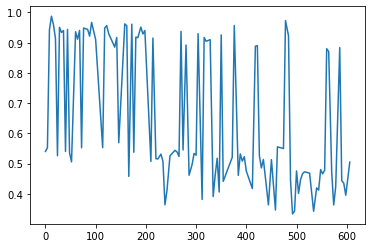

In [249]:
df_autonomie_corps3["indicateur autonomie corps"].plot()

## Indicateur activité économique (AE)

Nous avons testé pour cet indicateur un certain nombre de variables paraissant pertinenents dans les plots à l'image de: 

- Unemployment, female (% of female labor force) (modeled ILO estimate) (à comparer avec les hommes)
- Employers, female (% of female employment) (modeled ILO estimate)
- Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)
- Part time employement (à comparer avec les hommes)

Mais au vu de la régression effectuée, nous en avons retenu que trois pour former l'indicateur: 

- Employment to population ratio, 15+, female (%) (national estimate)
- Vulnerable employment, female (% of female employment) (modeled ILO estimate) 
- Vulnerable employment, female (% of male employment) (modeled ILO estimate) (les deux derniers étant utilisés pour faire un ratio)




In [250]:
df_employment= bm_select("SL.EMP.TOTL.SP.FE.NE.ZS",'Employment to population ratio, 15+, female')
df_employment.head(5)

,Country Code,"Employment to population ratio, 15+, female"
368,AFE,NaN
1811,AFW,NaN
3254,ARB,NaN
4697,CSS,NaN
6140,CEB,47.164873


In [251]:
df_vulnerableF=bm_select("SL.EMP.VULN.FE.ZS",'Vulnerable job, female')
df_vulnerableF

,Country Code,"Vulnerable job, female"
1421,AFE,76.909892
2864,AFW,85.851676
4307,ARB,30.901810
5750,CSS,22.670234
7193,CEB,11.992339
...,...,...
378044,VIR,3.290000
379487,PSE,20.000000
380930,YEM,60.650002
382373,ZMB,81.970001


In [252]:
df_vulnerableM=bm_select("SL.EMP.VULN.MA.ZS",'Vulnerable job, male')
df_vulnerableM

,Country Code,"Vulnerable job, male"
1422,AFE,63.898302
2865,AFW,72.743464
4308,ARB,24.518884
5751,CSS,30.247118
7194,CEB,16.326178
...,...,...
378045,VIR,3.290000
379488,PSE,22.420000
380931,YEM,47.120000
382374,ZMB,65.240001


In [253]:
# On fusionne tout ça dans le df activite economique
df_activite_economique=df_employment.merge(df_vulnerableF, on='Country Code', how='outer')
df_activite_economique=df_activite_economique.merge(df_vulnerableM, on='Country Code', how='outer')
df_activite_economique

,Country Code,Country Name_x,"Employment to population ratio, 15+, female",Country Name_y,"Vulnerable job, female",Country Name,"Vulnerable job, male"
0,AFE,Africa Eastern and Southern,NaN,Africa Eastern and Southern,76.909892,Africa Eastern and Southern,63.898302
1,AFW,Africa Western and Central,NaN,Africa Western and Central,85.851676,Africa Western and Central,72.743464
2,ARB,Arab World,NaN,Arab World,30.901810,Arab World,24.518884
3,CSS,Caribbean small states,NaN,Caribbean small states,22.670234,Caribbean small states,30.247118
4,CEB,Central Europe and the Baltics,47.164873,Central Europe and the Baltics,11.992339,Central Europe and the Baltics,16.326178
...,...,...,...,...,...,...,...
261,VIR,Virgin Islands (U.S.),NaN,Virgin Islands (U.S.),3.290000,Virgin Islands (U.S.),3.290000
262,PSE,West Bank and Gaza,10.610000,West Bank and Gaza,20.000000,West Bank and Gaza,22.420000
263,YEM,"Yemen, Rep.",NaN,"Yemen, Rep.",60.650002,"Yemen, Rep.",47.120000
264,ZMB,Zambia,23.170000,Zambia,81.970001,Zambia,65.240001


## Construction de l'indicateur activité économique 

In [254]:
df_activite_economique2=df_activite_economique.merge(df_pib, on='Country Code', how='outer')
df_activite_economique2

,Country Code,Country Name_x,"Employment to population ratio, 15+, female",Country Name_y,"Vulnerable job, female",Country Name,"Vulnerable job, male",GDP per capita 2019
0,AFE,Africa Eastern and Southern,NaN,Africa Eastern and Southern,76.909892,Africa Eastern and Southern,63.898302,1499.256275
1,AFW,Africa Western and Central,NaN,Africa Western and Central,85.851676,Africa Western and Central,72.743464,1843.558468
2,ARB,Arab World,NaN,Arab World,30.901810,Arab World,24.518884,6206.570758
3,CSS,Caribbean small states,NaN,Caribbean small states,22.670234,Caribbean small states,30.247118,10050.327615
4,CEB,Central Europe and the Baltics,47.164873,Central Europe and the Baltics,11.992339,Central Europe and the Baltics,16.326178,14823.026908
...,...,...,...,...,...,...,...,...
261,VIR,Virgin Islands (U.S.),NaN,Virgin Islands (U.S.),3.290000,Virgin Islands (U.S.),3.290000,NaN
262,PSE,West Bank and Gaza,10.610000,West Bank and Gaza,20.000000,West Bank and Gaza,22.420000,3378.434621
263,YEM,"Yemen, Rep.",NaN,"Yemen, Rep.",60.650002,"Yemen, Rep.",47.120000,NaN
264,ZMB,Zambia,23.170000,Zambia,81.970001,Zambia,65.240001,1348.743220


In [255]:
df_activite_economique2.dropna(inplace=True)

In [256]:
df_activite_economique2["Ratio women on men vulnerable job"]= df_activite_economique2["Vulnerable job, female"]/df_activite_economique2["Vulnerable job, male"]

In [257]:
df_activite_economique2

,Country Code,Country Name_x,"Employment to population ratio, 15+, female",Country Name_y,"Vulnerable job, female",Country Name,"Vulnerable job, male",GDP per capita 2019,Ratio women on men vulnerable job
4,CEB,Central Europe and the Baltics,47.164873,Central Europe and the Baltics,11.992339,Central Europe and the Baltics,16.326178,14823.026908,0.734547
5,EAR,Early-demographic dividend,29.908204,Early-demographic dividend,59.208722,Early-demographic dividend,55.063268,3535.796160,1.075285
9,EMU,Euro area,47.564725,Euro area,8.083995,Euro area,11.639252,36837.324655,0.694546
10,ECS,Europe & Central Asia,48.214855,Europe & Central Asia,12.032162,Europe & Central Asia,15.342440,24191.643063,0.784240
11,ECA,Europe & Central Asia (excluding high income),46.557737,Europe & Central Asia (excluding high income),16.797113,Europe & Central Asia (excluding high income),18.841331,8271.180476,0.891503
...,...,...,...,...,...,...,...,...,...
258,VUT,Vanuatu,41.930000,Vanuatu,70.659998,Vanuatu,65.669999,2882.402195,1.075986
260,VNM,Vietnam,62.510000,Vietnam,57.760000,Vietnam,47.290001,2604.224166,1.221400
262,PSE,West Bank and Gaza,10.610000,West Bank and Gaza,20.000000,West Bank and Gaza,22.420000,3378.434621,0.892061
264,ZMB,Zambia,23.170000,Zambia,81.970001,Zambia,65.240001,1348.743220,1.256438


In [258]:
X = df_activite_economique2[["Employment to population ratio, 15+, female","Ratio women on men vulnerable job"]]
X = sm.add_constant(X) # une autre façon d'ajouter une constante 
y = df_activite_economique2["GDP per capita 2019"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     GDP per capita 2019   R-squared:                       0.251
Model:                             OLS   Adj. R-squared:                  0.239
Method:                  Least Squares   F-statistic:                     20.15
Date:                 Tue, 04 Jan 2022   Prob (F-statistic):           2.84e-08
Time:                         15:25:51   Log-Likelihood:                -1381.8
No. Observations:                  123   AIC:                             2770.
Df Residuals:                      120   BIC:                             2778.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

Ration women on men Part time et unemployment ne sont pas pertinents (plus ils augmentent, plus le PIB augmente, il y a probablement des poblématiques culturelles liées aux pays (Exemple de l'Allemagne), ainsi que des problématiques liées à davantage de comptabilisation dans les pays développés.

In [259]:
df_activite_economique2["Ratio women on men vulnerable job Tx"]=100-df_activite_economique2["Ratio women on men vulnerable job"]
df_activite_economique2["Ratio women on men vulnerable job indicator"]=df_activite_economique2["Ratio women on men vulnerable job Tx"]/df_activite_economique2["Ratio women on men vulnerable job Tx"].max()
df_activite_economique2["Employment to population ratio, 15+ female indicator"]=df_activite_economique2["Employment to population ratio, 15+, female"]/df_activite_economique2["Employment to population ratio, 15+, female"].max()
df_activite_economique2

,Country Code,Country Name_x,"Employment to population ratio, 15+, female",Country Name_y,"Vulnerable job, female",Country Name,"Vulnerable job, male",GDP per capita 2019,Ratio women on men vulnerable job,Ratio women on men vulnerable job Tx,Ratio women on men vulnerable job indicator,"Employment to population ratio, 15+ female indicator"
4,CEB,Central Europe and the Baltics,47.164873,Central Europe and the Baltics,11.992339,Central Europe and the Baltics,16.326178,14823.026908,0.734547,99.265453,0.993924,0.629117
5,EAR,Early-demographic dividend,29.908204,Early-demographic dividend,59.208722,Early-demographic dividend,55.063268,3535.796160,1.075285,98.924715,0.990512,0.398936
9,EMU,Euro area,47.564725,Euro area,8.083995,Euro area,11.639252,36837.324655,0.694546,99.305454,0.994325,0.634450
10,ECS,Europe & Central Asia,48.214855,Europe & Central Asia,12.032162,Europe & Central Asia,15.342440,24191.643063,0.784240,99.215760,0.993426,0.643122
11,ECA,Europe & Central Asia (excluding high income),46.557737,Europe & Central Asia (excluding high income),16.797113,Europe & Central Asia (excluding high income),18.841331,8271.180476,0.891503,99.108497,0.992352,0.621018
...,...,...,...,...,...,...,...,...,...,...,...,...
258,VUT,Vanuatu,41.930000,Vanuatu,70.659998,Vanuatu,65.669999,2882.402195,1.075986,98.924014,0.990505,0.559290
260,VNM,Vietnam,62.510000,Vietnam,57.760000,Vietnam,47.290001,2604.224166,1.221400,98.778600,0.989049,0.833800
262,PSE,West Bank and Gaza,10.610000,West Bank and Gaza,20.000000,West Bank and Gaza,22.420000,3378.434621,0.892061,99.107939,0.992347,0.141523
264,ZMB,Zambia,23.170000,Zambia,81.970001,Zambia,65.240001,1348.743220,1.256438,98.743562,0.988698,0.309057


In [260]:
df_activite_economique2["Indicateur activité économique"]=1/8*(df_activite_economique2["Employment to population ratio, 15+ female indicator"])+7/8*(df_activite_economique2["Ratio women on men vulnerable job indicator"])

In [261]:
df_activite_economique2=df_activite_economique2[["Country Code", "Indicateur activité économique"]]
df_activite_economique2

,Country Code,Indicateur activité économique
4,CEB,0.948323
5,EAR,0.916565
9,EMU,0.949340
10,ECS,0.949638
11,ECA,0.945936
...,...,...
258,VUT,0.936603
260,VNM,0.969643
262,PSE,0.885994
264,ZMB,0.903743


In [262]:
df_activite_economique2["Indicateur activité économique"]=(df_activite_economique2["Indicateur activité économique"]-df_activite_economique2["Indicateur activité économique"].min())/(df_activite_economique2["Indicateur activité économique"].max()-df_activite_economique2["Indicateur activité économique"].min())
df_activite_economique2

<ipython-input-262-dd0b459e5657>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_activite_economique2["Indicateur activité économique"]=(df_activite_economique2["Indicateur activité économique"]-df_activite_economique2["Indicateur activité économique"].min())/(df_activite_economique2["Indicateur activité économique"].max()-df_activite_economique2["Indicateur activité économique"].min())


,Country Code,Indicateur activité économique
4,CEB,0.588086
5,EAR,0.311582
9,EMU,0.596942
10,ECS,0.599537
11,ECA,0.567299
...,...,...
258,VUT,0.486047
260,VNM,0.773711
262,PSE,0.045411
264,ZMB,0.199947


## Indicateur représentation politique (RP)

x variables :
- Représentation politique

In [263]:
df_rp_gdp = pd.read_csv('donnees_representation_pol.csv')
df_rp_gdp.rename(columns = {'Country' : 'Country Name', '2019' : 'GDP per capita 2019'}, inplace = True)
df_rp_gdp = df_rp_gdp.drop(df_rp_gdp.columns[0], axis = 1)
df_rp_gdp = df_rp_gdp.drop(df_rp_gdp.columns[6], axis = 1)
df_rp_gdp

,Country Name,Quota,Country Code,Specialized body,Women proportion (lower house),Women proportion (upper house),GDP per capita 2019
0,Afghanistan,1,AFG,1.0,27.0,27.9,577.563058
1,Afrique du Sud,1,ZAF,1.0,46.4,41.5,5574.643890
2,Albanie,1,ALB,1.0,35.7,NaN,4549.457441
3,Algérie,1,DZA,0.0,8.1,5.7,4111.306192
4,Allemagne,1,DEU,1.0,34.9,33.3,43311.628981
...,...,...,...,...,...,...,...
186,Venezuela (République bolivarienne du),1,VEN,NaN,22.2,NaN,NaN
187,Viet Nam,0,VNM,1.0,30.3,NaN,2604.224166
188,Yémen,0,YEM,NaN,0.0,1.1,NaN
189,Zambie,0,ZMB,1.0,15.1,NaN,1348.743220


In [264]:
df_rp_gdp.dropna(inplace=True)

In [265]:
X = df_rp_gdp[["Quota", "Specialized body", "Women proportion (upper house)"]]
X = sm.add_constant(X)
y = df_rp_gdp["GDP per capita 2019"]

model = sm.OLS(y, X.astype(float))
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     GDP per capita 2019   R-squared:                       0.135
Model:                             OLS   Adj. R-squared:                  0.098
Method:                  Least Squares   F-statistic:                     3.652
Date:                 Tue, 04 Jan 2022   Prob (F-statistic):             0.0166
Time:                         15:25:51   Log-Likelihood:                -828.47
No. Observations:                   74   AIC:                             1665.
Df Residuals:                       70   BIC:                             1674.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
co

La variable explicative "Specialized body" semble avoir une influence contre intuitive sur le niveau de développement économique d'un pays.
On retire la variable explicative "Women proportion (upper house)", qui était peu significative en pratique et statistiquement. 
Ici on ne prend en compte que 74 observations au lieu de 191 au départ.
On accorde le poids suivant aux différentes variables : 
 - Existence de quota : 8/11
 - Proportion de femmes dans la chambre haute du parlement : 2/11
 - Existence d'un organe spécialisé : 1/11

In [266]:
#On change le type de la variable women proportion
df_rp_gdp["Women proportion (upper house)"] = df_rp_gdp["Women proportion (upper house)"].astype(float, errors = 'raise')

In [267]:
df_rp_gdp["Women proportion (upper house)"].dtypes

dtype('float64')

In [268]:
df_rp_gdp["Women proportion (upper house) indicator"] = df_rp_gdp["Women proportion (upper house)"]/df_rp_gdp["Women proportion (upper house)"].max()

In [269]:
#Construction de l'indicateur
df_rp_gdp["Indicateur représentation politique"] = 2/11 * df_rp_gdp["Women proportion (upper house) indicator"] + 1/11 * df_rp_gdp["Specialized body"] + 8/11 * df_rp_gdp["Quota"]

In [270]:
df_rp_gdp2 = df_rp_gdp[["Country Code", "Indicateur représentation politique"]]
df_rp_gdp2

,Country Code,Indicateur représentation politique
0,AFG,0.909418
1,ZAF,0.953891
3,DZA,0.745912
4,DEU,0.927077
7,ATG,0.172989
...,...,...
174,THA,0.852191
178,TTO,0.223676
180,TKM,0.172662
184,URY,0.832897


In [271]:
df_rp_gdp2["Indicateur représentation politique"]=(df_rp_gdp2["Indicateur représentation politique"]-df_rp_gdp2["Indicateur représentation politique"].min())/(df_rp_gdp2["Indicateur représentation politique"].max()-df_rp_gdp2["Indicateur représentation politique"].min())
df_rp_gdp2[["Country Code", "Indicateur représentation politique"]]

<ipython-input-271-20d5aee9ebeb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rp_gdp2["Indicateur représentation politique"]=(df_rp_gdp2["Indicateur représentation politique"]-df_rp_gdp2["Indicateur représentation politique"].min())/(df_rp_gdp2["Indicateur représentation politique"].max()-df_rp_gdp2["Indicateur représentation politique"].min())


,Country Code,Indicateur représentation politique
0,AFG,0.925551
1,ZAF,0.973086
3,DZA,0.750786
4,DEU,0.944425
7,ATG,0.138413
...,...,...
174,THA,0.864383
178,TTO,0.192590
180,TKM,0.138064
184,URY,0.843761


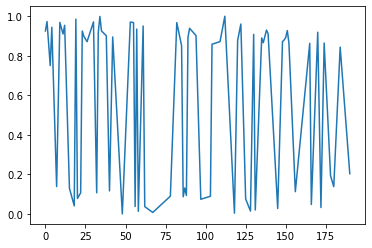

In [272]:
df_rp_gdp2["Indicateur représentation politique"].plot()

## Régression sur tous les indicateurs

Liste des indicateurs :
- df_pib
- df_rp_gdp2
- df_activite_economique2
- df_autonomie_corps3
- df_education3
- df_ressources_eco2
- df_sante2
- df_famille2

In [273]:
#On fusionne dans un même data frame tous les indicateurs
df_indicateurs=df_rp_gdp2.merge(df_activite_economique2, on='Country Code', how='outer')
df_indicateurs=df_indicateurs.merge(df_education3, on='Country Code', how='outer')
df_indicateurs=df_indicateurs.merge(df_ressources_eco2, on='Country Code', how='outer')
df_indicateurs=df_indicateurs.merge(df_sante2, on='Country Code', how='outer')
df_indicateurs=df_indicateurs.merge(df_famille2, on='Country Code', how='outer')
df_indicateurs=df_indicateurs.merge(df_autonomie_corps3, on='Country Code', how='outer')
df_indicateurs

,Country Code,Indicateur représentation politique,Indicateur activité économique,Indicateur education,Indicateur ressources économiques,Indicateur sante,Indicateur famille,indicateur autonomie corps
0,AFG,0.925551,NaN,NaN,NaN,0.368477,0.437282,0.333668
1,ZAF,0.973086,0.373365,0.384492,0.902762,0.375185,0.776205,0.917292
2,DZA,0.750786,NaN,NaN,0.442670,0.640306,0.670161,NaN
3,DEU,0.944425,0.698322,0.352426,0.890479,0.920906,0.923131,0.934021
4,ATG,0.138413,NaN,NaN,NaN,NaN,0.845038,NaN
...,...,...,...,...,...,...,...,...
228,AND,NaN,NaN,NaN,NaN,NaN,0.965059,NaN
229,DMA,NaN,NaN,NaN,NaN,NaN,0.860238,NaN
230,PLW,NaN,NaN,NaN,NaN,NaN,0.807827,NaN
231,SMR,NaN,NaN,NaN,NaN,NaN,0.965059,NaN


On cherche à remplacer les NaN par la valeur moyenne sur la ligne afin de pouvoir effectuer une régression linéaire

In [274]:
#On modifie l'index du data frame 
df_indicateurs = df_indicateurs.set_index("Country Code")
df_indicateurs

,Indicateur représentation politique,Indicateur activité économique,Indicateur education,Indicateur ressources économiques,Indicateur sante,Indicateur famille,indicateur autonomie corps
Country Code,,,,,,,
AFG,0.925551,NaN,NaN,NaN,0.368477,0.437282,0.333668
ZAF,0.973086,0.373365,0.384492,0.902762,0.375185,0.776205,0.917292
DZA,0.750786,NaN,NaN,0.442670,0.640306,0.670161,NaN
DEU,0.944425,0.698322,0.352426,0.890479,0.920906,0.923131,0.934021
ATG,0.138413,NaN,NaN,NaN,NaN,0.845038,NaN
...,...,...,...,...,...,...,...
AND,NaN,NaN,NaN,NaN,NaN,0.965059,NaN
DMA,NaN,NaN,NaN,NaN,NaN,0.860238,NaN
PLW,NaN,NaN,NaN,NaN,NaN,0.807827,NaN


In [275]:
#On transpose la matrice pour permettre de calculer la moyenne par colonne (sur les indicateurs)
df_indicateurs = df_indicateurs.T
df_indicateurs

Country Code,AFG,ZAF,DZA,DEU,ATG,ARG,AUS,AUT,BHR,BLR,...,WSM,KIR,TON,KWT,VCT,AND,DMA,PLW,SMR,KNA
Indicateur représentation politique,0.925551,0.973086,0.750786,0.944425,0.138413,0.968892,0.910171,0.954212,0.129325,0.040895,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Indicateur activité économique,NaN,0.373365,NaN,0.698322,NaN,0.544696,0.750078,0.668657,NaN,0.856635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Indicateur education,NaN,0.384492,NaN,0.352426,NaN,NaN,NaN,NaN,0.119662,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Indicateur ressources économiques,NaN,0.902762,0.442670,0.890479,NaN,0.949499,0.868785,0.895291,NaN,0.957416,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Indicateur sante,0.368477,0.375185,0.640306,0.920906,NaN,0.818298,0.986573,NaN,NaN,0.757308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Indicateur famille,0.437282,0.776205,0.670161,0.923131,0.845038,0.799616,0.902690,0.937107,0.849057,0.950734,...,0.523061,0.575472,0.577568,0.829315,0.865129,0.965059,0.860238,0.807827,0.965059,0.825297
indicateur autonomie corps,0.333668,0.917292,NaN,0.934021,NaN,NaN,0.540252,0.552370,NaN,0.940405,...,0.381555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [276]:
#On calcule la moyenne pour chaque colonne
#On remplace les nan par la valeur moyenne de la colonne
df_indicateurs = df_indicateurs.fillna(value = df_indicateurs.mean())
df_indicateurs

Country Code,AFG,ZAF,DZA,DEU,ATG,ARG,AUS,AUT,BHR,BLR,...,WSM,KIR,TON,KWT,VCT,AND,DMA,PLW,SMR,KNA
Indicateur représentation politique,0.925551,0.973086,0.750786,0.944425,0.138413,0.968892,0.910171,0.954212,0.129325,0.040895,...,0.452308,0.575472,0.577568,0.829315,0.865129,0.965059,0.860238,0.807827,0.965059,0.825297
Indicateur activité économique,0.516244,0.373365,0.625981,0.698322,0.491726,0.544696,0.750078,0.668657,0.366015,0.856635,...,0.452308,0.575472,0.577568,0.829315,0.865129,0.965059,0.860238,0.807827,0.965059,0.825297
Indicateur education,0.516244,0.384492,0.625981,0.352426,0.491726,0.816200,0.826425,0.801527,0.119662,0.750566,...,0.452308,0.575472,0.577568,0.829315,0.865129,0.965059,0.860238,0.807827,0.965059,0.825297
Indicateur ressources économiques,0.516244,0.902762,0.442670,0.890479,0.491726,0.949499,0.868785,0.895291,0.366015,0.957416,...,0.452308,0.575472,0.577568,0.829315,0.865129,0.965059,0.860238,0.807827,0.965059,0.825297
Indicateur sante,0.368477,0.375185,0.640306,0.920906,0.491726,0.818298,0.986573,0.801527,0.366015,0.757308,...,0.452308,0.575472,0.577568,0.829315,0.865129,0.965059,0.860238,0.807827,0.965059,0.825297
Indicateur famille,0.437282,0.776205,0.670161,0.923131,0.845038,0.799616,0.902690,0.937107,0.849057,0.950734,...,0.523061,0.575472,0.577568,0.829315,0.865129,0.965059,0.860238,0.807827,0.965059,0.825297
indicateur autonomie corps,0.333668,0.917292,0.625981,0.934021,0.491726,0.816200,0.540252,0.552370,0.366015,0.940405,...,0.381555,0.575472,0.577568,0.829315,0.865129,0.965059,0.860238,0.807827,0.965059,0.825297


In [277]:
#On transpose le data frame à nouveau pour récupérer celui initial sans les NaN
df_indicateurs = df_indicateurs.T
df_indicateurs

,Indicateur représentation politique,Indicateur activité économique,Indicateur education,Indicateur ressources économiques,Indicateur sante,Indicateur famille,indicateur autonomie corps
Country Code,,,,,,,
AFG,0.925551,0.516244,0.516244,0.516244,0.368477,0.437282,0.333668
ZAF,0.973086,0.373365,0.384492,0.902762,0.375185,0.776205,0.917292
DZA,0.750786,0.625981,0.625981,0.442670,0.640306,0.670161,0.625981
DEU,0.944425,0.698322,0.352426,0.890479,0.920906,0.923131,0.934021
ATG,0.138413,0.491726,0.491726,0.491726,0.491726,0.845038,0.491726
...,...,...,...,...,...,...,...
AND,0.965059,0.965059,0.965059,0.965059,0.965059,0.965059,0.965059
DMA,0.860238,0.860238,0.860238,0.860238,0.860238,0.860238,0.860238
PLW,0.807827,0.807827,0.807827,0.807827,0.807827,0.807827,0.807827


In [278]:
#On ajoute les données sur le pib
df_indicateurs=df_indicateurs.merge(df_pib, on='Country Code', how='outer')
df_indicateurs

,Country Code,Indicateur représentation politique,Indicateur activité économique,Indicateur education,Indicateur ressources économiques,Indicateur sante,Indicateur famille,indicateur autonomie corps,GDP per capita 2019
0,AFG,0.925551,0.516244,0.516244,0.516244,0.368477,0.437282,0.333668,577.563058
1,ZAF,0.973086,0.373365,0.384492,0.902762,0.375185,0.776205,0.917292,5574.643890
2,DZA,0.750786,0.625981,0.625981,0.442670,0.640306,0.670161,0.625981,4111.306192
3,DEU,0.944425,0.698322,0.352426,0.890479,0.920906,0.923131,0.934021,43311.628981
4,ATG,0.138413,0.491726,0.491726,0.491726,0.491726,0.845038,0.491726,16555.142078
...,...,...,...,...,...,...,...,...,...
261,SYR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,TCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28693.061321
263,VEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,VIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [279]:
#On supprime les NaN liés à la fusion du data frame pib
df_indicateurs.dropna(inplace=True)
df_indicateurs

,Country Code,Indicateur représentation politique,Indicateur activité économique,Indicateur education,Indicateur ressources économiques,Indicateur sante,Indicateur famille,indicateur autonomie corps,GDP per capita 2019
0,AFG,0.925551,0.516244,0.516244,0.516244,0.368477,0.437282,0.333668,577.563058
1,ZAF,0.973086,0.373365,0.384492,0.902762,0.375185,0.776205,0.917292,5574.643890
2,DZA,0.750786,0.625981,0.625981,0.442670,0.640306,0.670161,0.625981,4111.306192
3,DEU,0.944425,0.698322,0.352426,0.890479,0.920906,0.923131,0.934021,43311.628981
4,ATG,0.138413,0.491726,0.491726,0.491726,0.491726,0.845038,0.491726,16555.142078
...,...,...,...,...,...,...,...,...,...
228,AND,0.965059,0.965059,0.965059,0.965059,0.965059,0.965059,0.965059,39003.384448
229,DMA,0.860238,0.860238,0.860238,0.860238,0.860238,0.860238,0.860238,7617.846091
230,PLW,0.807827,0.807827,0.807827,0.807827,0.807827,0.807827,0.807827,15213.715905
231,SMR,0.965059,0.965059,0.965059,0.965059,0.965059,0.965059,0.965059,44709.458767


In [293]:
#On normalise la valeur du pib
df_indicateurs = normalize_columns(df_indicateurs, ["GDP per capita 2019"])
df_indicateurs

,Country Code,Indicateur représentation politique,Indicateur activité économique,Indicateur education,Indicateur ressources économiques,Indicateur sante,Indicateur famille,indicateur autonomie corps,GDP per capita 2019,indicateur global
0,AFG,0.925551,0.516244,0.516244,0.516244,0.368477,0.437282,0.333668,0.002869,0.391836
1,ZAF,0.973086,0.373365,0.384492,0.902762,0.375185,0.776205,0.917292,0.050777,0.525076
2,DZA,0.750786,0.625981,0.625981,0.442670,0.640306,0.670161,0.625981,0.036748,0.609139
3,DEU,0.944425,0.698322,0.352426,0.890479,0.920906,0.923131,0.934021,0.412570,0.890463
4,ATG,0.138413,0.491726,0.491726,0.491726,0.491726,0.845038,0.491726,0.156050,0.475534
...,...,...,...,...,...,...,...,...,...,...
228,AND,0.965059,0.965059,0.965059,0.965059,0.965059,0.965059,0.965059,0.371266,1.000000
229,DMA,0.860238,0.860238,0.860238,0.860238,0.860238,0.860238,0.860238,0.070366,0.879352
230,PLW,0.807827,0.807827,0.807827,0.807827,0.807827,0.807827,0.807827,0.143189,0.819028
231,SMR,0.965059,0.965059,0.965059,0.965059,0.965059,0.965059,0.965059,0.425972,1.000000


# Construction de l'indicateur global

In [294]:
#On effectue la régression
X = df_indicateurs[["Indicateur représentation politique", "Indicateur activité économique", "Indicateur education", "Indicateur ressources économiques", "Indicateur sante", "Indicateur famille", "indicateur autonomie corps"]]
X = sm.add_constant(X)
y = df_indicateurs["GDP per capita 2019"]

model = sm.OLS(y, X.astype(float))
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     GDP per capita 2019   R-squared:                       0.369
Model:                             OLS   Adj. R-squared:                  0.349
Method:                  Least Squares   F-statistic:                     18.79
Date:                 Tue, 04 Jan 2022   Prob (F-statistic):           1.16e-19
Time:                         16:08:38   Log-Likelihood:                 129.95
No. Observations:                  233   AIC:                            -243.9
Df Residuals:                      225   BIC:                            -216.3
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Pour cette régression, on a 233 observations. 
Les variables explicatives "Indicateur représentation politique", "Indicateur éducation" et "Indicateur ressources économiques" sont peu significatives statistiquement. En revanche, les variables "Indicateur activité économique", "Indicateur sante" et "Indicateur famille" sont très significatives en pratique. 
On pondère ces différentes variables en fonction de leur poids dans la régression de la façon suivante : 
- Indicateur représentation politique : 0.034 ie 1/20 
- Indicateur activité économique : 0.15 ie 2/20
- Indicateur education : 0.025 ie 1/20
- Indicateur ressources économiques : 0.051 ie 2/20
- Indicateur sante : 0.5 ie 10/20
- Indicateur famille : 0.16 ie 2/20
- Indicateur autonomie corps : 0.07 ie 2/20

In [285]:
df_indicateurs["indicateur global"] = 1/20 * df_indicateurs["Indicateur représentation politique"] + 1/10 * df_indicateurs["Indicateur activité économique"] + 1/20 * df_indicateurs["Indicateur education"] + 1/10 * df_indicateurs["Indicateur ressources économiques"] + 1/2 * df_indicateurs["Indicateur sante"] + 1/10 * df_indicateurs["Indicateur famille"] + 1/10 * df_indicateurs["indicateur autonomie corps"]
df_indicateurs[["indicateur global", "Country Code"]]

,indicateur global,Country Code
0,0.436672,AFG
1,0.552434,ZAF
2,0.625470,DZA
3,0.869891,DEU
4,0.509391,ATG
...,...,...
228,0.965059,AND
229,0.860238,DMA
230,0.807827,PLW
231,0.965059,SMR


In [288]:
df_indicateurs = normalize_columns(df_indicateurs, ["indicateur global"])
df_indicateurs[["Country Code", "indicateur global"]]

,Country Code,indicateur global
0,AFG,0.391836
1,ZAF,0.525076
2,DZA,0.609139
3,DEU,0.890463
4,ATG,0.475534
...,...,...
228,AND,1.000000
229,DMA,0.879352
230,PLW,0.819028
231,SMR,1.000000


In [292]:
#On trie les pays dans l'ordre croissant de l'indicateur global
df_indicateurs2 = df_indicateurs.sort_values(by=['indicateur global'])
df_indicateurs2[["Country Code", "indicateur global"]]

,Country Code,indicateur global
197,AFW,0.000000
66,SOM,0.047963
58,COD,0.050132
214,NER,0.060608
205,TCD,0.071998
...,...,...
67,CHE,0.949594
115,ISL,0.964356
139,SGP,0.986314
228,AND,1.000000


In [ ]:
df_famille2 = normalize_columns(df_famille2,["Indicateur famille"])
bm_select("SL.EMP.TOTL.SP.FE.NE.ZS",'Employment to population ratio, 15+, female')

Je pense qu'il faudra qu'on fasseune description de la répartition de chacun de nos indicateurs 
Toujours les problèmes avec l'indicateur domestique 
Est ce qu'on laisse des traces style scrappinget tout ? 

POur la méthode avec 100- quand on fait pour des valeurs qui sont inférieures à 10 on obtient des trucq compris entre 0.9 et 1

Positivité de certains ratios peu cohérents dans l'activitééco : regarder la distribution